# Iris Classification
### Improve on this!
####		1. Adjust model hyperparameters
####		2. Add varied algorithms:  XGBoost, LightGBM
####		3. Use Neural Networks
####		4. More EDA (Exploratory Data Analysis): Feature engineering (Try Length/Width), Graphics, Unsupervised classification, Feature Contribution

## Note: Improvement does not necessarily mean better performance! Improved EDA is great as well!

# Import Libraries

In [81]:
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np
import seaborn as sns 
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load dataset

In [131]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

dataset = pd.read_csv(url, names=names)     #dataset is Pandas DataFrame object

# shape
print("Shape: ",dataset.shape,"\n")

# head
print("First records of data:\n ",dataset.head(),"\n")

# check if data clean
print("Null data: ", dataset.isnull().sum().sum())
print("NA data: ", dataset.isna().sum().sum(),"\n")

# class distribution
print("Number of records per", dataset.groupby('class').size())

Shape:  (150, 5) 

First records of data:
     sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa 

Null data:  0
NA data:  0 

Number of records per class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## Data Load Notes:
#### 1. Small dataset containing 150 records with 5 columns 
#### 2. Data looks clean
#### 3. Equal number of records per Iris class (50)

# Descriptions of Data

In [3]:
print("Statistical description of data:\n",dataset.describe())

Statistical description of data:
        sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [4]:
print('Average measurements by Iris class: \n', dataset.groupby('class').mean())

Average measurements by Iris class: 
                  sepal-length  sepal-width  petal-length  petal-width
class                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


In [5]:
print('Standard deviation by Iris class: \n', dataset.groupby('class').std())

Standard deviation by Iris class: 
                  sepal-length  sepal-width  petal-length  petal-width
class                                                                
Iris-setosa          0.352490     0.381024      0.173511     0.107210
Iris-versicolor      0.516171     0.313798      0.469911     0.197753
Iris-virginica       0.635880     0.322497      0.551895     0.274650


## Description Notes:
#### 1. Average size of Irises from largest to smallest is generally Virginica, Versicolor, and Setosa 
#### 2. Sepal length and petal length of Virginica has highest variance within their data

# Data Visualizations

## Box and Whisker plots

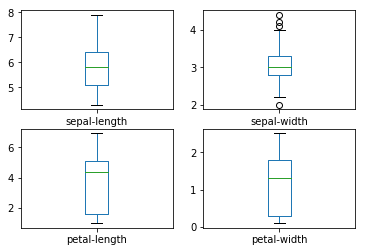

In [6]:
# Pandas box plot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

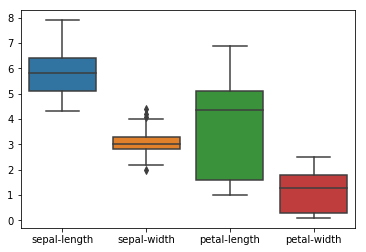

In [7]:
#Seaborn box plot
sns.boxplot(data=dataset)

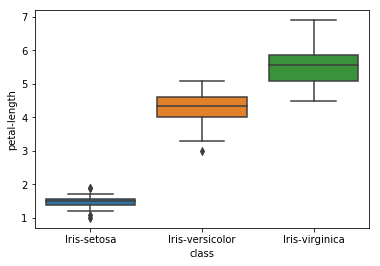

In [8]:
# Petal length data has largest spread. Sepal-width looks like has outliers. Let's see those data points by class
sns.boxplot(x='class', y='petal-length', data=dataset)

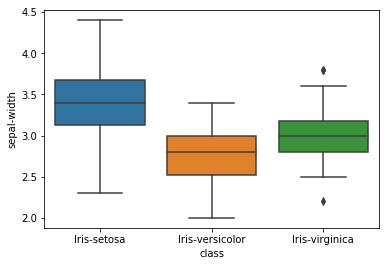

In [9]:
sns.boxplot(x='class', y='sepal-width', data=dataset)

## Histograms

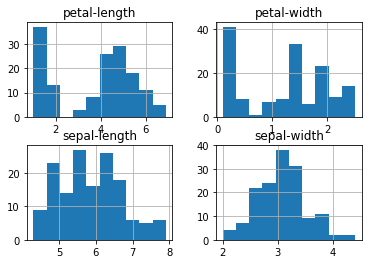

In [10]:
dataset.hist()
plt.show()

## Scatter plot matrix

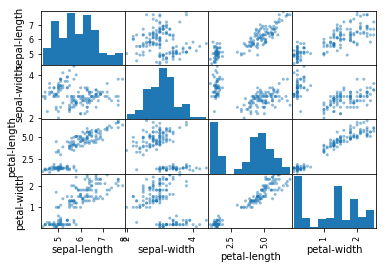

In [11]:
scatter_matrix(dataset)
plt.show()

C:\Users\selena\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


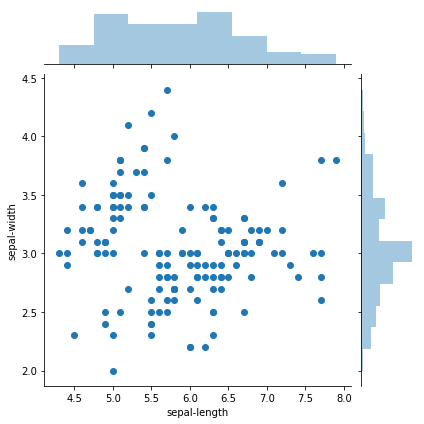

In [12]:
# using the seaborn library to create a similar plot on sepal measurements
sns.jointplot(x='sepal-length', y='sepal-width', data=dataset, height=6)

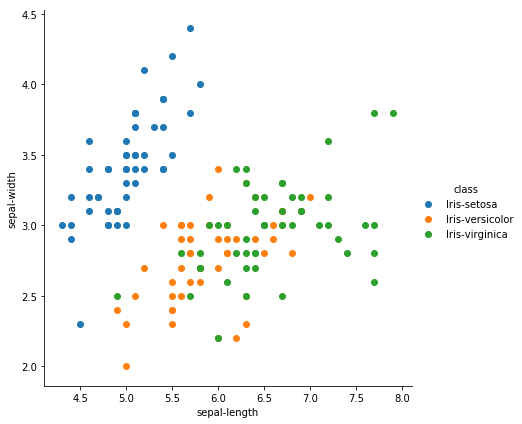

In [13]:
# using seaborn's FacetGrid to color the scatterplot by species on sepal measurements
sns.FacetGrid(dataset, hue='class', height=6) \
   .map(plt.scatter, 'sepal-length', 'sepal-width') \
   .add_legend()

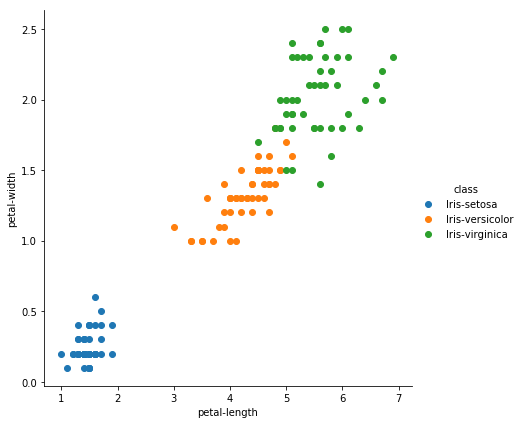

In [14]:
# using seaborn's FacetGrid to color the scatterplot by species on petal measurements
sns.FacetGrid(dataset, hue='class', height=6) \
   .map(plt.scatter, 'petal-length', 'petal-width') \
   .add_legend()

## Visualization Notes:
#### 1. Potential outliers in data for each Iris class
#### 2. Sepal and petal measurements have generally positive relationship (x goes up, y goes up)
#### 3. Within sepal measurements, Setosa is quite separate whereas Virginica and Versicolor have overlap
#### 4. Within petal measurements, each Iris class is pretty separate, ie. clustered

# Split-out validation dataset

In [87]:
# Array is 150 records with 5 columns unlabelled data
array = dataset.values

# X is array of 150 records with 4 columns of measurements
X = array[:,0:4]

# Y is a vector of 150 values for iris class
Y = array[:,4]   

# Split dataset into 20% test size, 80% training size.  Set random_state so data is split same way
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

# Create Model Shells (Instantiate them)

In [26]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Spot test each model with Cross-Validation

In [8]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

results = []
names = []

# Cross Validation - Create a bunch of train/test splits, calculate testing accuracy for each, and average results together
# Evaluate each model in turn
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)    #perform 10 fold cross validation on training set
	cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=kfold, scoring=scoring)   
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.966667 (0.040825)
RF: 0.958333 (0.041667)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


# Graphical comparison of algorithms

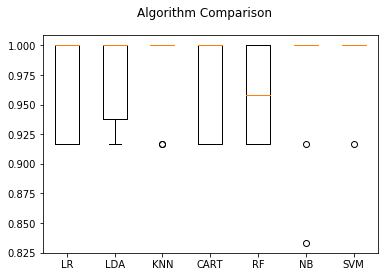

In [18]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# K-Nearest Neighbors

In [20]:
#Default values:
#KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn = KNeighborsClassifier()           
knn.fit(X_train, Y_train)
   
# Make Y predictions on the X validation set
predictions = knn.predict(X_validation)   

# Compare Y validation set with Y predictions
print('Accuracy Score: ', accuracy_score(Y_validation, predictions), '\n')
print('Confusion Matrix: \n', confusion_matrix(Y_validation, predictions), '\n')
print('Classification Report: \n', classification_report(Y_validation, predictions), '\n')

Accuracy Score:  0.9 

Confusion Matrix: 
 [[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]] 

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30
 



# Tune K-Nearest Neighbors hyperparameters

In [23]:
# try K=1 through K=20 and record testing accuracy
k_range = range(1, 20)
scores = []
 
# Loop through the range and record the scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_validation)    
    result = accuracy_score(Y_validation, predictions)
    scores.append(result)
    print('K = ', k, '  Accuracy: ' , result)    


K =  1   Accuracy:  0.9
K =  2   Accuracy:  0.9333333333333333
K =  3   Accuracy:  0.9
K =  4   Accuracy:  0.9333333333333333
K =  5   Accuracy:  0.9
K =  6   Accuracy:  0.8666666666666667
K =  7   Accuracy:  0.8666666666666667
K =  8   Accuracy:  0.9
K =  9   Accuracy:  0.9
K =  10   Accuracy:  0.9
K =  11   Accuracy:  0.9
K =  12   Accuracy:  0.9
K =  13   Accuracy:  0.9
K =  14   Accuracy:  0.9333333333333333
K =  15   Accuracy:  0.9
K =  16   Accuracy:  0.9
K =  17   Accuracy:  0.9
K =  18   Accuracy:  0.9
K =  19   Accuracy:  0.9


Text(0,0.5,'Test Accuracy')

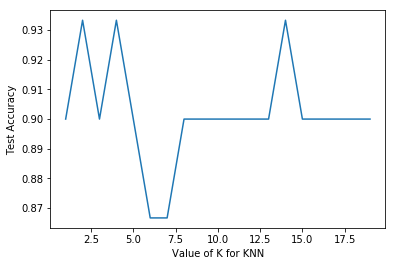

In [25]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Test Accuracy')

In [15]:
# Best accuracy can get is 0.9333. Take most neighbors with most accuracy, k = 14
# Try different sampling (random state) and loop from 1 to 10 to see if better accuracy
s_range = range(1, 10)

for s in s_range:
    knn = KNeighborsClassifier(n_neighbors=14)
    X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
        X, Y, test_size=validation_size, random_state=s)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_validation)
    print('Random state = ', s,  '  Accuracy: ' , accuracy_score(Y_validation, predictions))

Random state =  1   Accuracy:  0.9666666666666667
Random state =  2   Accuracy:  0.9666666666666667
Random state =  3   Accuracy:  1.0
Random state =  4   Accuracy:  0.9666666666666667
Random state =  5   Accuracy:  0.9666666666666667
Random state =  6   Accuracy:  1.0
Random state =  7   Accuracy:  0.9333333333333333
Random state =  8   Accuracy:  0.9666666666666667
Random state =  9   Accuracy:  1.0


In [29]:
#  If neighbors is 14 and random_state is 9, then accuracy 100%
seed = 9
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)
knn = KNeighborsClassifier(n_neighbors=14)           
knn.fit(X_train, Y_train)

predictions = knn.predict(X_validation)   # Predict the class labels for the provided data

# Returns the mean accuracy on the given test data and labels.
print('Accuracy Score: ', accuracy_score(Y_validation, predictions), '\n')
print('Confusion Matrix: \n', confusion_matrix(Y_validation, predictions), '\n')
print('Classification Report: \n', classification_report(Y_validation, predictions), '\n')

Accuracy Score:  1.0 

Confusion Matrix: 
 [[13  0  0]
 [ 0  9  0]
 [ 0  0  8]] 

Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         8

    avg / total       1.00      1.00      1.00        30
 



## SVM - Support Vector Machine:

In [9]:
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



## Tune SVM Hyperparameters

In [12]:
# Default SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, 
# probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
# decision_function_shape=’ovr’, random_state=None)
kernel_type = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']

for k in range(0, len(kernel_type)-1):
    svm = SVC(kernel=kernel_type[k], random_state=42)
    svm.fit(X_train, Y_train)
    predictions = svm.predict(X_validation)
    print('Kernel: ', kernel_type[k], " Accuracy: ", accuracy_score(Y_validation, predictions))

Kernel:  linear  Accuracy:  0.9666666666666667
Kernel:  poly  Accuracy:  0.8333333333333334
Kernel:  rbf  Accuracy:  0.9333333333333333
Kernel:  sigmoid  Accuracy:  0.23333333333333334


In [17]:
# Use linear kernel and try turning on probability estimates

svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print("Accuracy: ", accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy:  1.0
[[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         8

    avg / total       1.00      1.00      1.00        30



# Try XGBBoost and LightGBM
# I could not finish these - both have incompatible object types error


In [132]:
## Convert Iris class to integers and split out train, test again
dict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
dataset['class'].replace(dict, inplace=True)

# Array is 150 records with 5 columns unlabelled data
array = dataset.values

# X is array of 150 records with 4 columns of measurements
X = array[:,0:4]

# Y is a vector of 150 values for iris class
Y = array[:,4]   

## XG Boost

In [146]:
# Convert data into DMatrix
data_dmatrix = xgb.DMatrix(data=X,label=Y)

# Split dataset into 20% test size, 80% training size.  Set random_state so data is split same way
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(
    X, Y, test_size=validation_size, random_state=seed)

#Instantiate with hyperparameters
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Fit regressor to training set
xg_reg.fit(X_train,Y_train)

predictions = xg_reg.predict(X_validation)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

## LightGBM

In [148]:
# Create LightGBM Dataset object
d_train = lgb.Dataset(X_train, label=Y_train)

# Set parameters
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'        
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

# Train it
num_round = 10
bst = lgb.train(params, train_set=d_train, num_boost_round=num_round)

# Output is list of probabilities
predictions = bst.predict(X_validation)

# Convert probabilities into binary values
for i in range(0,predictions.size-1):
    if predictions[i]>=.5:       # setting threshold to .5
        predictions[i] = 1
    else:  
        predictions[i] = 0

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets